In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_excel('insurance.xlsx')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check for null

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Categorical columns

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [6]:
print(f"sex: {df.sex.unique()}")
print(f"smoker: {df.smoker.unique()}")
print(f"region: {df.region.unique()}")

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


# Encoding

A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,) (though in the past one used LabelEncoder within the loop to handle what has been becoming the job of OrdinalEncoder now)

In [7]:
oenc = OrdinalEncoder(dtype=int)

In [8]:
df[['sex', 'smoker', 'region']] = oenc.fit_transform(df[['sex', 'smoker', 'region']])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Statistical details

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Correlation

<Axes: >

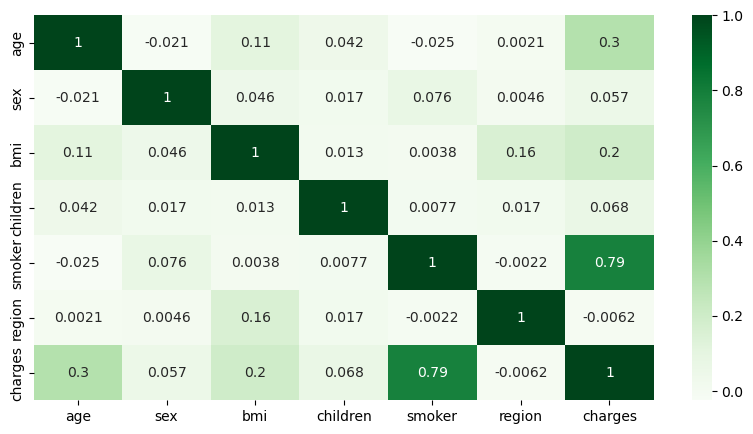

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="Greens")

### Features & Target

In [11]:
X = df.drop('charges',axis=1)
y = df['charges']

# Linear Regression

In [12]:
xtrain, xtest, ytrain, ytest = tts(X, y, test_size=0.3, random_state=59)

In [13]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [14]:
reg_pred = reg.predict(xtest)

In [15]:
reg_score = reg.score(xtest,ytest)
reg_score

0.7902875714194754

In [16]:
m = reg.coef_
m

array([  260.86262494,  -654.30371529,   347.92376991,   593.26870807,
       22914.90257011,  -410.43244007])

In [17]:
c = reg.intercept_
c

-12101.600016703522

In [18]:
reg_mae = mean_absolute_error(ytest, reg_pred)
reg_mae

4201.226882820519

In [19]:
reg_mse = mean_squared_error(ytest, reg_pred)
reg_mse

35330648.708306774

# KNN Regression

In [20]:
xtrain, xtest, ytrain, ytest = tts(X, y, test_size=0.3, random_state=80)

In [21]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=7)

In [22]:
knn_pred = knn.predict(xtest)

In [23]:
knn_score = knn.score(xtest,ytest)
knn_score

0.18006912665400365

In [24]:
knn_mae = mean_absolute_error(ytest, knn_pred)
knn_mae

7790.593188940654

In [25]:
knn_mse = mean_squared_error(ytest, knn_pred)
knn_mse

113821337.21635266

# Comparison

In [26]:
dfm = pd.DataFrame({
    'Algorithm':['Linear', 'KNN'],
    'Accuracy Score':[reg_score, knn_score],
    'Mean Absolute Error': [reg_mae, knn_mae],
    'Mean Squared Error':[reg_mse, knn_mse]})
dfm.head()

,Algorithm,Accuracy Score,Mean Absolute Error,Mean Squared Error
0,Linear,0.790288,4201.226883,3.533065e+07
1,KNN,0.180069,7790.593189,1.138213e+08


In [27]:
columns = dfm.columns

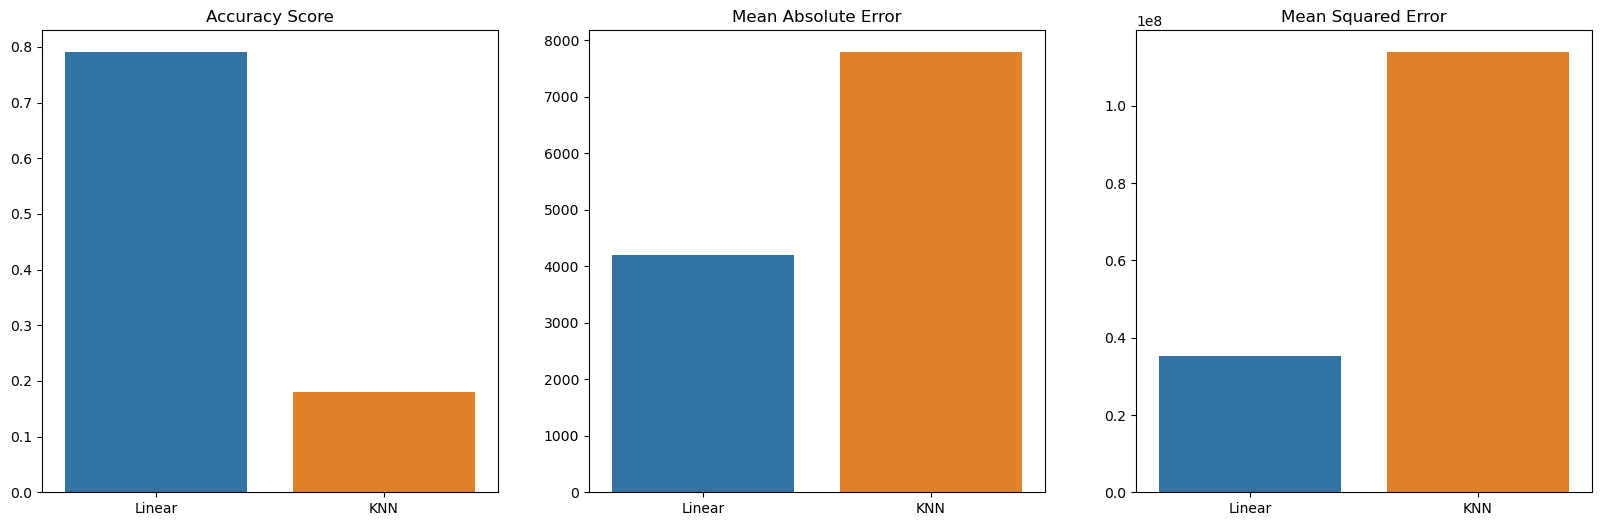

In [28]:
plt.figure(figsize=(20,6))

for i in range(1,4):
   plt.subplot(1, 3, i)
   sns.barplot(data=dfm, x="Algorithm", y=columns[i])
   plt.xlabel("")
   plt.ylabel("")
   plt.title(columns[i])